### Issues with psi4

There seems to be 2 issues:
1. When the scan is started with a start angle of 0, many structures don't converge
2. Even the structues that do converge, the molecular mechanics energy of those structures are an order of magnitude higher than the QM energis. This issue was resolved when I used structures generated with Pymol.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as qmd
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [2]:
param = CharmmParameterSet('../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../structure/butane.psf'
scan = ['HF/butane_scan_0_neg.log', 'HF/butane_scan_0_pos.log', 'HF/butane_scan_180_neg.log',
        'HF/butane_scan_180_pos.log']

In [3]:
butane_scan_0_neg = qmd.parse_psi4_log(scan[0], structure)
butane_scan_0_pos = qmd.parse_psi4_log(scan[1], structure)
butane_scan_180_neg = qmd.parse_psi4_log(scan[2], structure)
butane_scan_180_pos = qmd.parse_psi4_log(scan[3], structure)
butane_scan_180_pos.compute_energy(param)
# Save pdb trajectory of scan
#butane_scan.save_pdb('butane_traj.pdb')

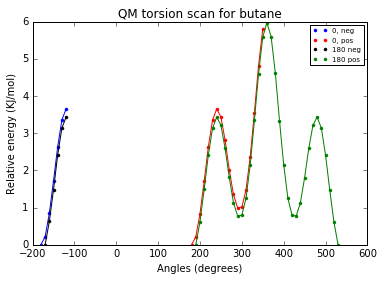

In [24]:
plt.plot(butane_scan_0_neg.steps, butane_scan_0_neg.qm_energy, '.', color='blue', label='0, neg')
plt.plot(butane_scan_0_neg.steps, butane_scan_0_neg.qm_energy, color='blue')

plt.plot(butane_scan_0_pos.steps, butane_scan_0_pos.qm_energy, '.', color='red', label='0, pos')
plt.plot(butane_scan_0_pos.steps, butane_scan_0_pos.qm_energy, color='red')

plt.plot(butane_scan_180_neg.steps, butane_scan_180_neg.qm_energy, '.', color='black', label='180 neg')
plt.plot(butane_scan_180_neg.steps, butane_scan_180_neg.qm_energy, color='black')

plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy, '.', color='green', label='180 pos')
plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy, color='green')


plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.legend(prop={'size':7})
plt.savefig('Butane_torsion_scan.pdf')
#plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

When I do a torsion scan of butane in psi4, the geometry optimization of structures with dihedrals between 0 and 180 don't converge. 

I tried running from -180 in the positive and negative direction:

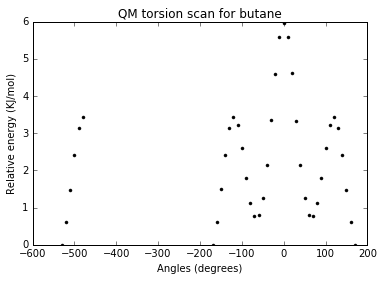

In [11]:
scan = ['HF/butane_scan_n180_neg.log', 'HF/butane_scan_n180_pos.log']
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

# save trajectory
butane_scan.save_pdb('butane_traj_n180.pdb')

plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.xlabel('Angles (degrees)')
plt.ylabel('Relative energy (KJ/mol)')
plt.title('QM torsion scan for butane')
plt.savefig('Butane_torsion_scan_n180.pdf')

In this case, the structures between 0 and 180 do converge. 

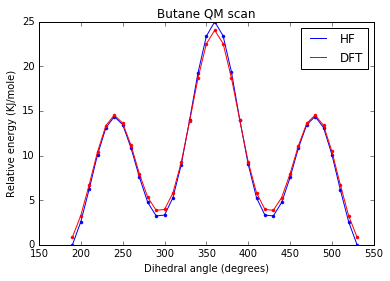

In [27]:
scan_DFT = ['DFT_b3lyp/butane_scan_b3lyp_360.log']
butane_scan_DFT = ScanSet.parse_psi4(scan_DFT, structure)

plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy*4.184,'.', color='blue')
plt.plot(butane_scan_180_pos.steps, butane_scan_180_pos.qm_energy*4.184, color='blue', label='HF')
plt.plot(butane_scan_DFT.steps, butane_scan_DFT.qm_energy,'.', color='red')
plt.plot(butane_scan_DFT.steps, butane_scan_DFT.qm_energy, color='red', label='DFT')
plt.legend()
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Relative energy (KJ/mole)')
plt.title('Butane QM scan')

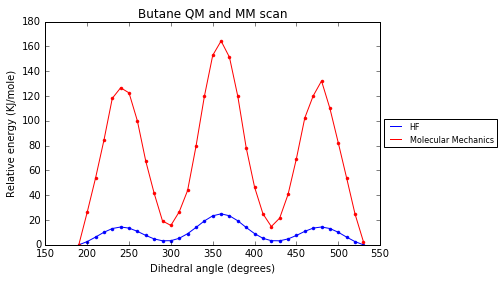

In [9]:
plt.plot(butane_scan_180_pos.angles, butane_scan_180_pos.qm_energy*4.184,'.', color='blue')
plt.plot(butane_scan_180_pos.angles, butane_scan_180_pos.qm_energy*4.184, color='blue', label='HF')
plt.plot(butane_scan_180_pos.angles, butane_scan_180_pos.mm_energy,'.', color='red')
plt.plot(butane_scan_180_pos.angles, butane_scan_180_pos.mm_energy, color='red', label='Molecular Mechanics')
lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Relative energy (KJ/mole)')
plt.title('Butane QM and MM scan')

Molecular Mechanics energy is much higher than QM energy. However, when structures were generated with pymol, MM energy is much closer to QM energies. 

In [11]:
butane_pymol = qmd.parse_psi4_out('../B3LYP_torsion_scan/',  structure)

[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/30/butane

/Users/sternc1/anaconda/lib/python2.7/site-packages/torsionfit-0+untagged.550.ge3124b6.dirty-py2.7.egg/torsionfit/database/qmdatabase.py:189: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/40/butane_40.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/70/butane_70.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/80/butane_80.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/90/butane_90.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/100/but

/Users/sternc1/anaconda/lib/python2.7/site-packages/torsionfit-0+untagged.550.ge3124b6.dirty-py2.7.egg/torsionfit/database/qmdatabase.py:189: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/320/butane_320.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/340/butane_340.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/350/butane_350.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit/examples/butane/torsion_scans/psi4_archive/../B3LYP_torsion_scan/360/butane_360.out2 WARNING] In logfileparser.py, line 461, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


In [13]:
butane_pymol = butane_pymol.remove_nonoptimized()
butane_pymol.compute_energy(param)

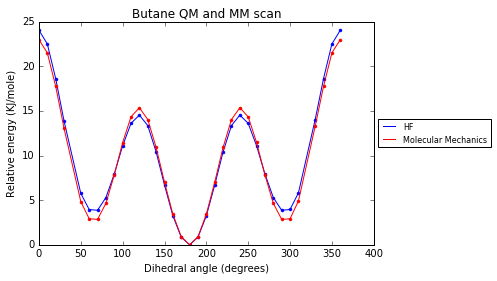

In [14]:
plt.plot(butane_pymol.angles, butane_pymol.qm_energy,'.', color='blue')
plt.plot(butane_pymol.angles, butane_pymol.qm_energy, color='blue', label='HF')
plt.plot(butane_pymol.angles, butane_pymol.mm_energy,'.', color='red')
plt.plot(butane_pymol.angles, butane_pymol.mm_energy, color='red', label='Molecular Mechanics')
lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Relative energy (KJ/mole)')
plt.title('Butane QM and MM scan')